In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Question 3 


In [2]:
beta0=1
beta1=2
beta2=1.5


In [3]:
def make_Exp(X,beta0,beta1,beta2):
    mone=np.exp(beta0+X[:,0]*beta1+X[:,1]*beta2)
    mechane=1+mone
    return (mone/mechane)

In [4]:
nn=np.arange(100,20100,100).tolist()
X1_C=[]
X2_C=[]
X0_C=[]
for i  in nn:
    X=np.random.normal(0, 1, size=(i, 2))
    p=make_Exp(X,beta0,beta1,beta2)
    y=np.random.binomial(1, p=p)
    clf = LogisticRegression().fit(X, y)
    if i ==100:
        print ('regression coefficients for n=100:',clf.coef_,clf.intercept_)
    if i ==20000:
        print ('regression coefficients for n=20,000:',clf.coef_,clf.intercept_)
    X1_C.append(clf.coef_[0])
    X0_C.append(clf.intercept_)
    #X2_C.append(clf.coef_[1])
    
    

regression coefficients for n=100: [[1.29103994 1.41493042]] [0.57626314]
regression coefficients for n=20,000: [[2.01963243 1.50066276]] [0.98946338]


In [5]:
X1_C = np.array(X1_C)
X1_C1=X1_C[:,0]
X2_C=X1_C[:,1]
X0_C = np.array(X0_C)

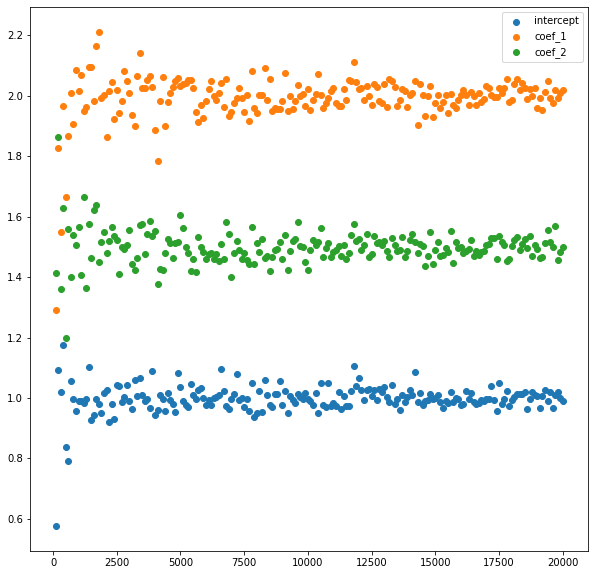

In [6]:
fig,ax=plt.subplots(1,1,figsize=(10, 10))
# plt.plot(X0_C,nn)

plt.scatter(nn,X0_C)
plt.scatter(nn,X1_C1)
plt.scatter(nn,X2_C)
ax.legend(['intercept','coef_1','coef_2'])
plt.show()

# 3.4 log_loss calc 

In [35]:
y = np.loadtxt('y.dat', unpack = True)
X = np.loadtxt('x.dat', unpack = True).reshape(40,2)
clf = LogisticRegression().fit(X, y)
pred=clf.predict(X)
print('regression coefficients:',clf.coef_,clf.intercept_)
print("log loss:",log_loss(pred,y))

regression coefficients: [[0.24343755 0.65148034]] [-0.48355167]
log loss: 11.225202278024748


# question 4

In [36]:
from numpy import random
import random as rand
from numpy.core.fromnumeric import std
from numpy.lib.function_base import average
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import pylab
REAL_BETAS = np.array([0.05,0.3,0.2])
X_MEAN = 0
X_STD = 1
NUM_TO_DRAW_A = 20
MAX_TRAIN_SIZE = 1000
TRAIN_SIZE_STEP = 10



In [37]:
normals = random.normal(0,1,10*2)
normals
xArray = np.ndarray((10,2),np.float64)
xArray

array([[ 0.09196521,  0.55521957],
       [ 0.1073125 ,  0.75403203],
       [-2.27486076,  0.899631  ],
       [ 1.27637821, -0.02976436],
       [ 0.47133059, -1.10760799],
       [-0.26515265, -0.95101995],
       [ 0.30636482, -0.40397615],
       [ 0.83557349,  0.69003023],
       [ 0.48969676,  1.20054548],
       [ 0.51747088, -0.23406705]])

In [38]:
def calculateLamda(x1,x2,b=REAL_BETAS):
    result = np.exp(np.dot(b,np.array([1,x1,x2])))
    return result

def drawY(numToDraw,mean,std,b=REAL_BETAS):
    yArray = np.array(np.zeros(numToDraw));
    lamdasArray=np.array(np.zeros(numToDraw));
    normals = random.normal(mean,std,numToDraw*2)
    xArray = np.ndarray((numToDraw,2),np.float64)
    for i in range(0,numToDraw*2,2):
        index = int(i/2)
        lamdasArray[index] = calculateLamda(normals[i],normals[i+1],b)
        yArray[index] = random.poisson(lam=lamdasArray[index],size=1)
        xArray[index][0]=normals[i]
        xArray[index][1]=normals[i+1]
    return yArray,xArray,lamdasArray
        
def calculatePoissonLoss(y,realY):
    N = len(y)
    logY = np.log(y)
    yRealLogYy= realY*logY
    sumResult = sum(y - yRealLogYy)
    return sumResult/N




# Minimizing this Poisson loss is equivalent of maximizing the likelihood

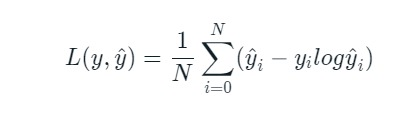

In [41]:
from IPython.display import Image
Image(filename ="img.png", width=1000, height=1000)

In [42]:
#draw 20 numbers from poisson distribution into y_arrary
#xArray is 20 couples of numbers randomly distributed from normal(0,1) distribution
yArray,xArray,lamdasArray = drawY(NUM_TO_DRAW_A,X_MEAN,X_STD)
#fitting a poisson regressor with log link function
clf = linear_model.PoissonRegressor(alpha=0)
clf.fit(xArray,yArray)
#printing betas
betas = [clf.intercept_,clf.coef_[0],clf.coef_[1]]
print(f"beta0:{clf.intercept_}, beta1:{clf.coef_[0]}, beta2:{clf.coef_[1]}")
#drawing 10000 examples from using betas
yArrayTest,xArrayTest,lamdasArrayTest = drawY(10000,X_MEAN,X_STD)
#poisson loss as found in the internet  - sum(y_i-realY_i*log(y_i))/N
yTestPred = clf.predict(xArrayTest)


#q4.5
loss = calculatePoissonLoss(yTestPred,yArrayTest)
print(f"poisson Loss is: {loss}")

beta0:0.05939977462465799, beta1:0.2353794937055963, beta2:0.23832783413738148
poisson Loss is: 0.914791399965167


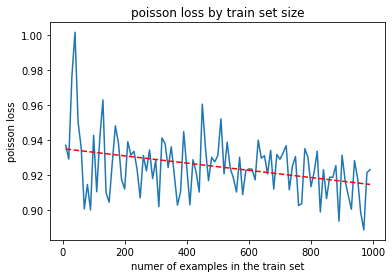

In [43]:
#q 4.6
# poisson loss for differnt n: 10,20, … ,1000
ranges = []
losses = []
for n in range(10,MAX_TRAIN_SIZE,TRAIN_SIZE_STEP):
    yArray,xArray,lamdasArray = drawY(n,X_MEAN,X_STD)
    clf = linear_model.PoissonRegressor(alpha=0)
    clf.fit(xArray,yArray)
    betas = [clf.intercept_,clf.coef_[0],clf.coef_[1]]
    yArrayTest,xArrayTest,lamdasArrayTest = drawY(MAX_TRAIN_SIZE,X_MEAN,X_STD)
    yTestPred = clf.predict(xArrayTest)
    loss = calculatePoissonLoss(yTestPred,yArrayTest)
    ranges.append(n)
    losses.append(loss)
plt.plot(ranges,losses)
# naming the x axis
plt.xlabel('numer of examples in the train set')
# naming the y axis
plt.ylabel('poisson loss')
# giving a title to my graph
plt.title('poisson loss by train set size')
# calc the trendline
z = np.polyfit(ranges, losses, 1)
p = np.poly1d(z)
pylab.plot(ranges,p(ranges),"r--")    
# function to show the plot
plt.show()
#print(f"test losses are: {losses}")

#As we can see, the loss decreases slowly when the train set size increases.
#This make sense as long as the train size increases the approximated betas converge to the real betas
#The test set betas are draw from the real betas distribution so when the train size gets bigger the gap between the distribution gets smaller and thats why the loss decreases too. 


# 4.7

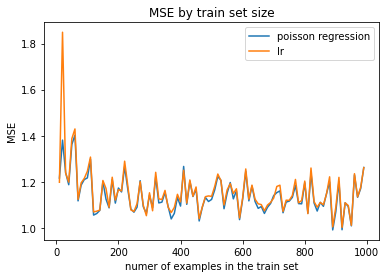

Lamdas are:[1.41053784 0.88410504 0.71803741 1.52994862 1.77548016 0.87516184
 0.86837922 0.57800808 1.13380358 1.98687472 1.53482346 1.0671665
 1.28278209 1.12001307 0.80349115 0.86724073 1.29985206 0.95329019
 1.36132888 1.30165017 0.96735217 1.29771031 1.73097702 1.09589768
 0.85970477 0.98231982 0.94770838 1.36263649 1.30680345 0.89178719
 0.79187766 0.81664961 0.72804243 0.7118522  0.68556027 0.82439941
 1.10278246 1.51810634 1.87730245 0.83698239 1.64059815 0.92204095
 1.1572647  1.19483901 0.95904915 1.55010999 1.23954858 0.89720526
 1.42922041 1.22095887 0.69598969 1.04788213 1.57761321 1.0760448
 0.74986788 0.70117573 1.8088872  0.89475501 0.83465953 0.70645963
 1.19221667 1.32048404 0.99499187 1.74929889 2.08723933 1.22803053
 0.64762462 0.9915852  0.83612801 1.22499027 0.67609043 0.992312
 0.74943759 0.87721937 0.90223653 0.8716407  1.13964023 1.67159189
 0.838695   0.80122686 1.0507202  0.80097968 1.91967971 0.91729634
 0.85054536 0.71273904 0.90461197 0.96469874 0.86800818

In [44]:
ranges = []
poissonLosses = []
lrLosses = []
for n in range(10,MAX_TRAIN_SIZE,TRAIN_SIZE_STEP):
    yArray,xArray,lamdasArray = drawY(n,X_MEAN,X_STD)
    #poisson regression
    clf = linear_model.PoissonRegressor(alpha=0)
    clf.fit(xArray,yArray)
    betas_poisson = [clf.intercept_,clf.coef_[0],clf.coef_[1]]
    #linear regression
    lr = linear_model.LinearRegression()
    lr.fit(xArray,yArray)
    betas_lr = [lr.intercept_,lr.coef_[0],lr.coef_[1]]  
    yArrayTest,xArrayTest,lamdasArrayTest = drawY(MAX_TRAIN_SIZE,X_MEAN,X_STD)
#     print(f"lamdas are: {average(lamdasArrayTest)}")
    yTestPredPoisson = clf.predict(xArrayTest)
    yTestPredLr = lr.predict(xArrayTest)
    poissonLoss = mean_squared_error(yArrayTest,yTestPredPoisson)
    lrLoss = mean_squared_error(yArrayTest,yTestPredLr)
    poissonLosses.append(poissonLoss)
    lrLosses.append(lrLoss)
    ranges.append(n)
plt.plot(ranges,poissonLosses,label="poisson regression")
plt.plot(ranges,lrLosses, label="lr")
# naming the x axis
plt.xlabel('numer of examples in the train set')
# naming the y axis
plt.ylabel('MSE')
# giving a title to my graph
plt.title('MSE by train set size')
plt.legend()
plt.show()    
#As we can see, the results are very similar between the models. why?
#lets have a look at the lamdas from the last iteration
print(f"Lamdas are:{lamdasArray}, lamdas avg is:{average(lamdasArray)}, std is: {std(lamdasArray)}")
#the std of the lambdas is very small so no matter what  is x , y distribution will be almost identical for every x
#The corelation between x and y is close to zero so it doesnt matter if we will use LR or poission regression to predict y whice is mainly poisson noise.